In [53]:
import pandas as pd
import math

In [2]:
data=pd.DataFrame.from_csv('./data_export_cobercat/data_export_1-2015.csv')
#imports info from csv

In [3]:
d=data.drop(['incident','downloadSpeed','uploadSpeed'],1)
#Removes choosen columns (0:row, 1:column) 

In [4]:
d

,date,lat,lng,signal_inst,signal_min,signal_max,signal_avg,carrier,fullCarrier,status,net,net_type,lac,cid,psc,speed,satellites,precision1,provider,activity
timestamp,,,,,,,,,,,,,,,,,,,,
1449356375000,2015-12-05 23:59:35.000000,26.66748,-81.88311,31,31,31,31,T-Mobile,T-Mobile,2,13.0,4G,33121,17562114,0,44.9,1,31,gps,0
1449356368337,2015-12-05 23:59:28.337000,42.25159,1.86371,12,12,16,12,pepephone,movistar,0,15.0,3G,860,79191379,-1,5.0,0,134,fused,2
1449356352411,2015-12-05 23:59:12.411000,-9.40254,-38.21590,7,7,7,7,VIVO,VIVO,2,15.0,3G,40175,17796053,45,1.6,2,63,fused,3
1449356343918,2015-12-05 23:59:03.918000,41.15327,0.82813,12,5,99,12,Orange,orange,2,10.0,3G,2150,17551221,93,0.0,0,24,fused,5
1449356337000,2015-12-05 23:58:57.000000,41.70663,2.40211,3,1,3,2,Movistar,movistar,2,15.0,3G,867,164375746,109,0.1,5,15,gps,5
1449356334084,2015-12-05 23:58:54.084000,41.98277,2.81148,12,12,12,12,Orange,orange,0,13.0,4G,2140,15071499,326,0.3,2,128,gps,3
1449356327000,2015-12-05 23:58:47.000000,26.66710,-81.88912,31,31,31,31,T-Mobile,T-Mobile,2,13.0,4G,33121,17562114,0,30.0,0,67,gps,3
1449356314000,2015-12-05 23:58:34.000000,41.19183,1.60886,8,8,8,8,Movistar,movistar,2,13.0,4G,43610,110082580,0,0.0,3,18,gps,3
1449356307116,2015-12-05 23:58:27.116000,41.42331,2.16138,31,31,31,31,NaN,NaN,-1,0.0,NaN,-1,-1,-1,0.0,7,48,gps,5


In [5]:
def getDate(i):
    return d['date'].iloc[i-1]
    #Returns the date of the choosen position

In [6]:
from dateutil import parser
dt = parser.parse(getDate(1))
#Converts string to date
print dt

2015-12-05 23:59:35


In [29]:
def getPosition(i):
    return (d.iloc[i]['lat'],data.iloc[i]['lng'])
    #Returns a tuple with the coordinates of the choosen position

In [51]:
import random
import webbrowser
def mapPosition():
    for i in range(10):
        pos=getPosition(random.randint(1,10000))
        url='https://www.google.es/search?q='+str(pos[0])+','+str(pos[1])
        #Shows the location in Google Maps
        webbrowser.open(url)


In [52]:
mapPosition()

In [23]:
import matplotlib.pyplot as plt

In [47]:
x=[]
y=[]
for i in range(len(d.index)):
    pos=getPosition(i)
    x.append(pos[0])
    y.append(pos[1])

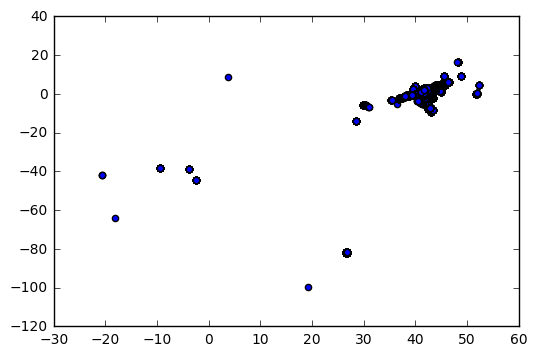

In [48]:
plt.scatter(x,y)
plt.show()

In [63]:
posList=[]
x=[]
y=[]
for i in range(len(d.index)):
    pos=getPosition(i)
    x.append(math.floor(pos[0]))
    y.append(math.floor(pos[1]))
    #posList.append((math.floor(pos[0]),math.floor(pos[1])))

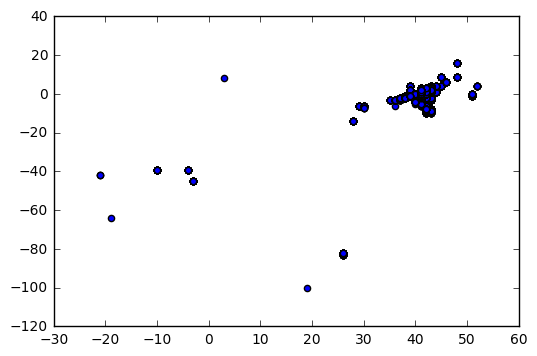

In [64]:
plt.scatter(x,y)
plt.show()